# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Loading the dataset**

In [ ]:
from google.colab import files
files = files.upload()

Saving Insurance Data - Insurance Data.csv to Insurance Data - Insurance Data (1).csv


In [ ]:
data = pd.read_csv("Insurance Data - Insurance Data.csv")

# **Preview of the dataset**

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Basic information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Describe the data

data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.duplicated().sum()

1

# **Checking if there is any outlier or not. If yes then removing it.**

**Assigning our dependent variable i.e "*charges*" to some variable and ploting the Box-plot to see the varaibility of data points.**

In [ ]:
B=data["charges"]

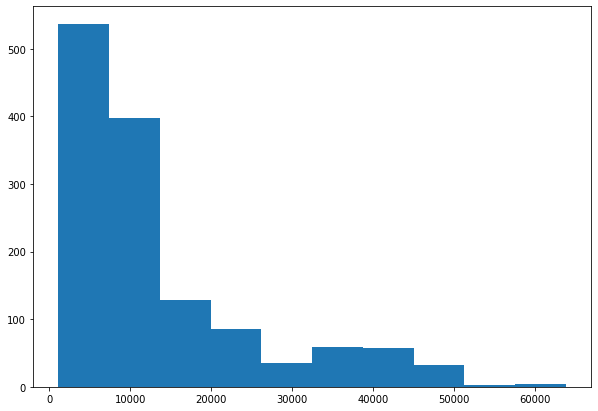

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(B)

# Show plot
plt.show()
# Not Normally disributed

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


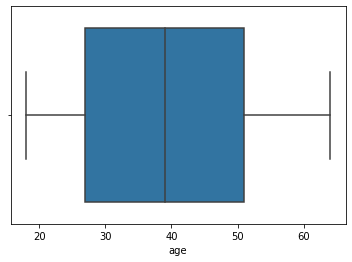

In [ ]:
import seaborn as sns  # Library to plot Box plot
sns.boxplot(data["age"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


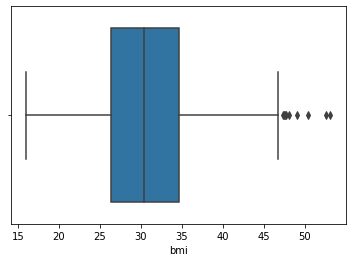

In [ ]:
sns.boxplot(data["bmi"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


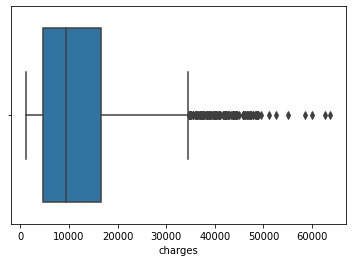

In [ ]:
sns.boxplot(B)

The above Box-plot shows that there are some points that are outliers. So we remove those points and make our dataset free from outliers.

**Showing the list of outliers data points.**

In [ ]:
def dropout(df,col):
  for i in col:
    q25,q75 = np.percentile(a = df[i],q=[25,75])
    IQR = q75 - q25
    lowrange=q25-(1.5*IQR)
    uprange=q75+(1.5*IQR)
    print (i," lower = ",lowrange," upper = ",uprange)
    df=df[(df[i]>=lowrange) & (df[i]<=uprange) ]
  return df


In [ ]:
col = ["bmi","charges"]
newdf = dropout(data,col)
print(newdf.shape)


bmi  lower =  13.7  upper =  47.290000000000006
charges  lower =  -13034.076065  upper =  34358.841975
(1191, 7)


In [ ]:
B= newdf["charges"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


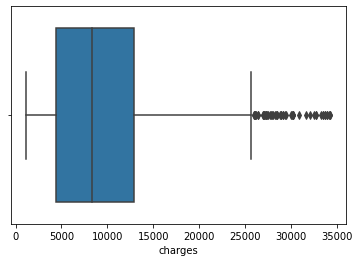

In [ ]:
sns.boxplot(B)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


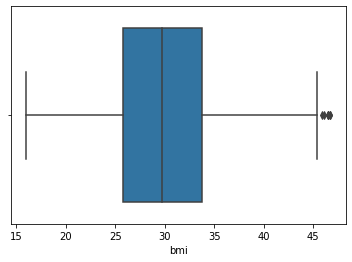

In [ ]:
sns.boxplot(newdf["bmi"])

**Now, converting the Categorical variables to numerical using Dummy variables**

In [ ]:
CatVar = ["sex","smoker","region"] # Here, in the dataset, there are three Categorical varibles
data = pd.get_dummies(newdf,columns=CatVar,drop_first=True)  # Syntax to convert Categorical to Dummy varibles.

**Dataset after converting Categorical Variables to Numerical one.**

In [ ]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


# **Step wise Regression**

**Step 1 :** First take all the independent variables and run the Annova Model to check whether the model is significant or not by looking at the probability of F-Statistics. If the probability of F-Statistics is smaller than 0.05 then the model is significant otherwise not.

> To check the significance of each feature we look at p-value. If the p-value is less than 0.05 then the that feature is significant otherwise not.





In [ ]:
x = data.drop(["charges"],axis=1) # Extracting the independent variables
y = data["charges"] # Dependent Variable.

In [ ]:
print(x.columns)

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


**OLS Model**

In [ ]:
from statsmodels.formula.api import ols
MLR = ols("y~x",data).fit()
print(MLR.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     226.9
Date:                Thu, 03 Nov 2022   Prob (F-statistic):          1.19e-232
Time:                        14:20:22   Log-Likelihood:                -11712.
No. Observations:                1191   AIC:                         2.344e+04
Df Residuals:                    1182   BIC:                         2.349e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2971.4610    818.000     -3.633      0.0


**From OLS table, the probability of F-statistics is *1.19e-232* which is smaller than 0.05 that means the model is statistically significant.**

Now checking whether the features are significant or not.

> From the OLS table, the features region_northwest , gender are not significant as they have p-value more than 0.05. So removing the variable that has lager p-value i.e region will be deleted first.


> From the OLS table, the feature region_northwest is not significant. Hence region_northwest will be deleted next.


> Since the variable region_northwest is a dummy variable so all the dummy variable of region will be deleted.










In [ ]:
#x = data.drop(["region_northwest","charges",
 #      "region_southeast", "region_southwest"],axis=1)  # Extracting the independent variables, Removing Region
#y = data["charges"] # Dependent Variable.

In [ ]:
#x.columns

In [ ]:
#MLR = ols("y~x",data).fit()
#print(MLR.summary())

**Now the probability of F-statistics is *9.74e-234* which is less than that of
the previous case. So this implies that the model is significantly improving**

> Now the p-value of the feature gender i.e 0.185 is greater than 0.05 , so in next case it will be removed.



In [ ]:
x = x.drop(["sex_male"],axis=1)  # Extracting the independent variables
y = data["charges"] # Dependent Variable.

In [ ]:
MLR = ols("y~x",data).fit()
print(MLR.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     258.9
Date:                Thu, 03 Nov 2022   Prob (F-statistic):          1.71e-233
Time:                        14:20:22   Log-Likelihood:                -11712.
No. Observations:                1191   AIC:                         2.344e+04
Df Residuals:                    1183   BIC:                         2.348e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3127.4022    809.772     -3.862      0.0

**From OLS table, the probability of F-statistics is *1.29e-234* which is smaller than 0.05 that means the model is statistically significant.**







**Now , all the p-values of independent variables are less than 0.05 so now model is statistically significant.**

# ***Calculating the Residuals***

Calculating the y_pred using the OLS model

In [ ]:
y_pred = MLR.predict(x)
y_pred[:10]

0    16424.991863
1     2941.408894
2     6201.156767
3     6211.816315
4     6388.671878
5     5145.012730
6     9776.114153
7     8830.302303
8     8834.691645
9    13038.282096
dtype: float64

**Finding Residuals**

In [ ]:
residual = y - y_pred
residual[:10]

0      459.932137
1    -1215.856594
2    -1751.694767
3    15772.654295
4    -2521.816678
5    -1388.391130
6    -1535.524553
7    -1548.796703
8    -2428.280945
9    15884.854824
dtype: float64

**Plotting the scatter plot between residuals and the y_pred**

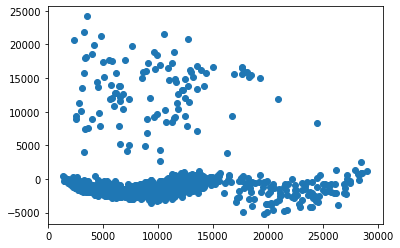

In [ ]:
plt.scatter(y_pred,residual)

# **Assumptions Checking**

**Testing normality of errors**

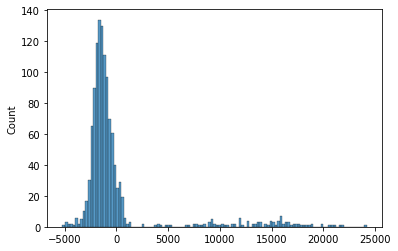

In [ ]:
sns.histplot(data=data,x=residual)

**Testing Multi-collinearity among Predictors**

In [ ]:
#origdata = pd.read_csv("Insurance Data - Insurance Data.csv")

In [ ]:
data.shape

(1191, 9)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X_VIF = data[["age","bmi","children"]]
X_VIF

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #measures multicollinearity among independent variables
X_VIF = data[["age","bmi","children"]]
corr = X_VIF.corr()
corr

,age,bmi,children
age,1.000000,0.123827,0.038179
bmi,0.123827,1.000000,0.007546
children,0.038179,0.007546,1.000000


**correleation among predictors is less than 0.5 hence no multi-collinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X_VIF = data[["age","bmi","children"]]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_VIF.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_VIF.values, i)
                          for i in range(len(X_VIF.columns))]

print(vif_data)

    feature       VIF
0       age  7.616749
1       bmi  7.935312
2  children  1.768840


**Clearly, the VIF Factor is less than 10, so no multi-collineality among predictors**

               age       bmi  children
age       1.000000  0.123827  0.038179
bmi       0.123827  1.000000  0.007546
children  0.038179  0.007546  1.000000


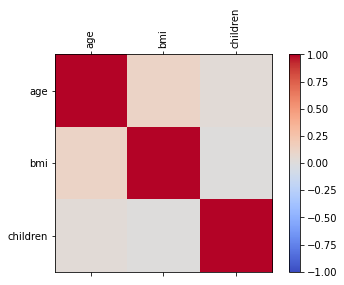

In [ ]:
corr = X_VIF.corr()
print (corr)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X_VIF.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X_VIF.columns)
ax.set_yticklabels(X_VIF.columns)
plt.show()

In [ ]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(MLR.resid)
#Since this is within the range of 1.5 and 2.5, we would consider autocorrelation not to be problematic in this regression model.

2.051614831829056

**Checking Homoscedasticity**

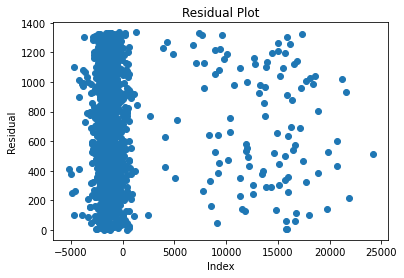

In [ ]:
#Homoscedasticity
plt.scatter(residual,residual.index)
plt.title("Residual Plot")
plt.xlabel("Index")
plt.ylabel("Residual")
plt.show()

**Clearly there is no convergence or divergence between the residuals and residuals index**

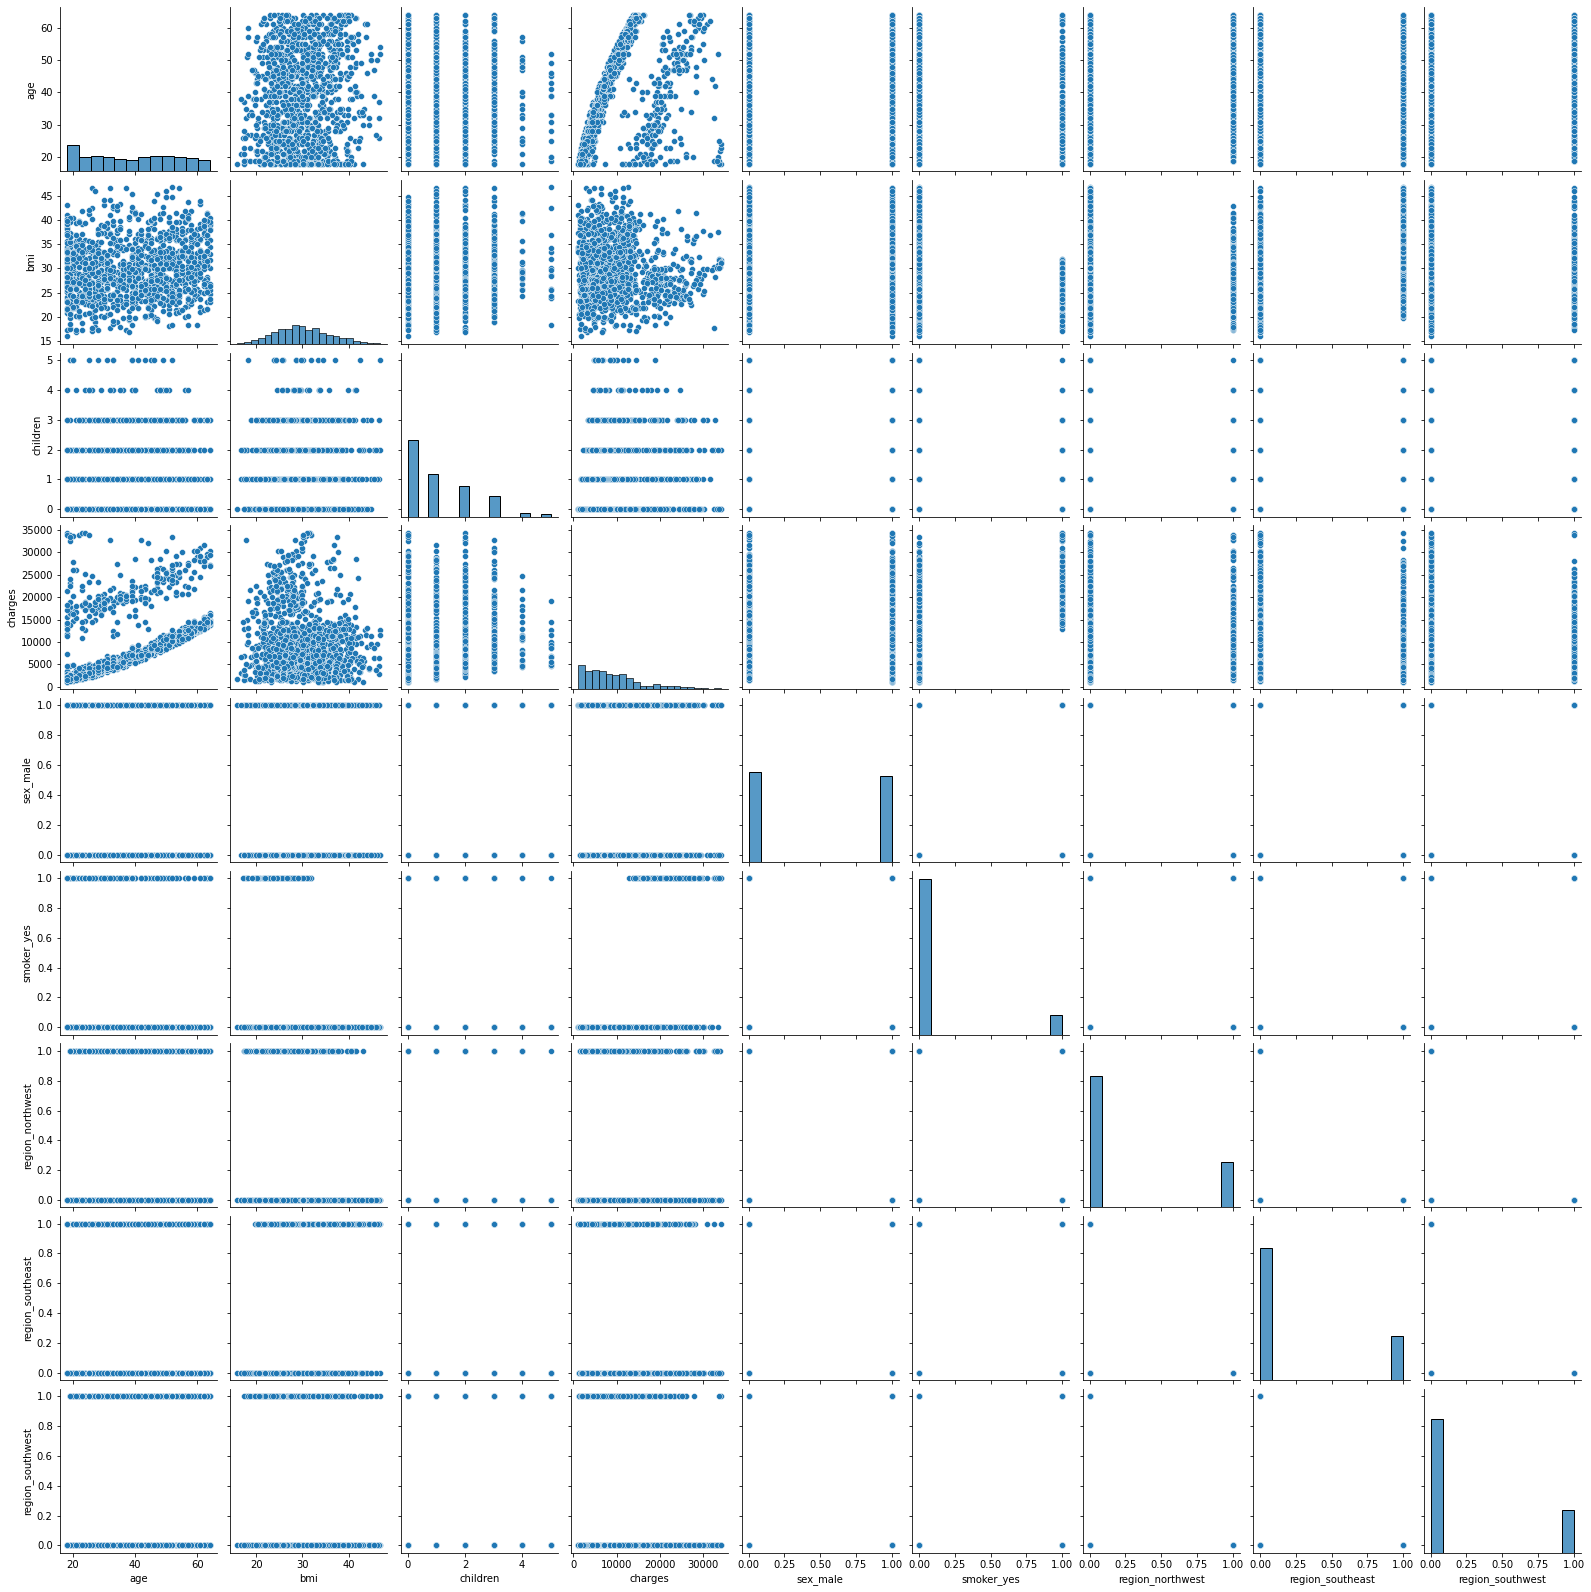

**Checking Autocorrelation**

```No Autocorrelation of the Error TermsPermalink
Durbin Watson test
Idealy it should be in betwenn 1.5 to 2.5

if durbinWatson < 1.5
Signs of positive autocorrelation', '\n')


if durbinWatson > 2.5:
Signs of negative autocorrelation


```



In [ ]:
print(MLR.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     258.9
Date:                Thu, 03 Nov 2022   Prob (F-statistic):          1.71e-233
Time:                        14:20:24   Log-Likelihood:                -11712.
No. Observations:                1191   AIC:                         2.344e+04
Df Residuals:                    1183   BIC:                         2.348e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3127.4022    809.772     -3.862      0.0

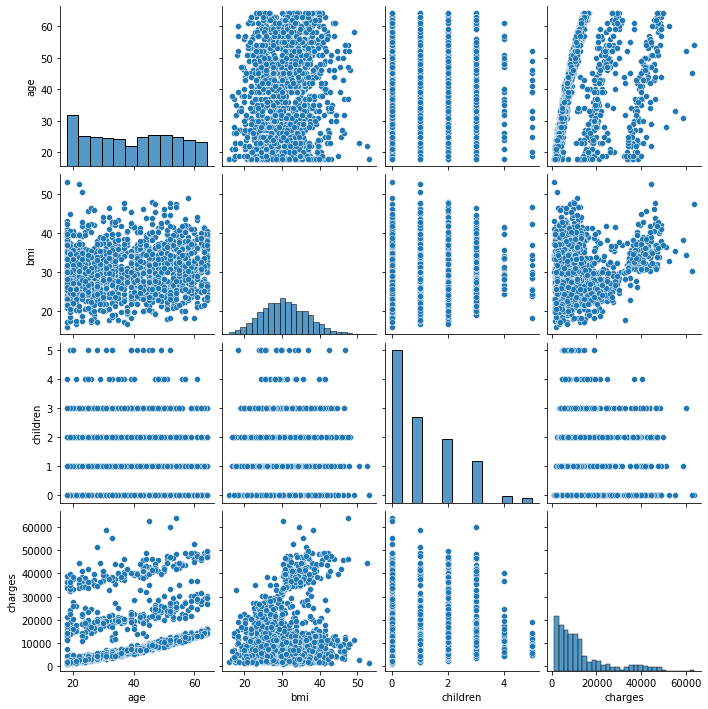

In [ ]:
ndata = pd.read_csv("Insurance Data - Insurance Data.csv")
import seaborn as sns
sns.pairplot(ndata)

In [ ]:
#Here the value of Durbin-Watson is 1.997 that means no auto-correlation